# Churn Rate Analysis Bank Customer
----
- **Nama:** Muhamad Fajar Faturohman
- **Email:** fajarftr2605@gmail.com
- **ID Dicoding:** mnjarrr

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [7]:
data = pd.read_csv('../dataset/Churn_Modelling.csv')

In [8]:
data.shape

(10000, 14)

Dataset ini memiliki 13 kolom dengan 10.000 baris

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Drop kolom `RowNumber`, karena ini tidak diperlukan

In [10]:
data = data.drop('RowNumber', axis=1)

## Deskripsi variabel

- CustomerId: ID unik untuk setiap pelanggan.

- Surname: Nama belakang pelanggan.

- Skor kredit pelanggan. Skor ini menggambarkan kelayakan kredit seseorang. Nilai yang lebih tinggi menunjukkan riwayat kredit yang lebih baik, sementara nilai yang lebih rendah menunjukkan risiko kredit yang lebih tinggi.

- Geography: Negara asal pelanggan.

- Gender: Jenis kelamin pelanggan

- Age: Umur pelanggan.

- Tenure: Lama waktu pelanggan telah menggunakan layanan (dalam tahun).

- Balance: Saldo akun pelanggan. Ini adalah jumlah uang yang pelanggan miliki di akun mereka. Fitur ini bisa menjadi indikator kekayaan pelanggan atau potensi transaksi.

- NumOfProducts: Jumlah produk yang digunakan pelanggan. Kolom ini mencerminkan berapa banyak layanan atau produk yang pelanggan gunakan dari perusahaan, yang bisa menunjukkan loyalitas pelanggan.

- HasCrCard: Status apakah pelanggan memiliki kartu kredit atau tidak (1 = Ya, 0 = Tidak).

- IsActiveMember: Status apakah pelanggan adalah anggota yang aktif (1 = Aktif, 0 = Tidak Aktif).

- EstimatedSalary: Estimasi gaji atau penghasilan tahunan pelanggan.

- Exited: Ini adalah target atau label yang menunjukkan apakah pelanggan telah keluar atau tidak (1 = Keluar, 0 = Tidak Keluar).

# Explanatory Data Analysis

## Basic data understanding

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [12]:
# Memisahkan categorical, numerical, dan target features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
target = 'Exited'

print(f'Numerical features: {numerical_features}\n\nCategorical Features: {categorical_features}\n\nTarget features: {target}')

Numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

Categorical Features: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

Target features: Exited


In [33]:
data[numerical_features].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,650.690740,37.735786,5.015364,76434.055500,1.515991,100094.184752
std,96.093507,8.782984,2.887869,62416.191144,0.549766,57522.969343
min,383.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51014.837500
50%,652.000000,37.000000,5.000000,97089.635000,1.000000,100129.330000
75%,717.000000,43.000000,7.000000,127611.332500,2.000000,149461.830000
max,850.000000,62.000000,10.000000,250898.090000,3.000000,199992.480000


Cek apakah terdapat nilai null pada data

In [16]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Berdasarkan output di atas, tidak terdapat nilai null pada dataset

## Univariate Analysis

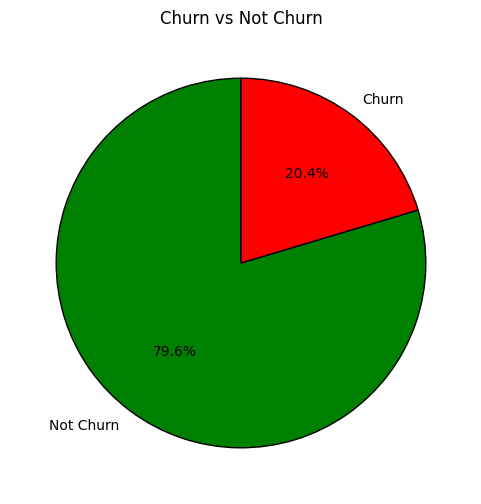

In [232]:
churn_or_not_churn = ['Not Churn', 'Churn']
exited_counts = data[target].value_counts().sort_index()
colors = sns.color_palette(['green', 'red'])

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    exited_counts,
    labels=churn_or_not_churn,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Churn vs Not Churn')
plt.show()

Berdasarkan distribusi di atas, label `Not Churn` lebih banyak dibandingkan label `Churn`. Ini berarti data untuk kolom `Exited` memiliki distribusi yang tidak seimbang. Maka, pada saat pemodelan, resampling techniques seperti SMOTE atau undersampling akan digunakan agar model tidak overfit atau bias.

### Histogram

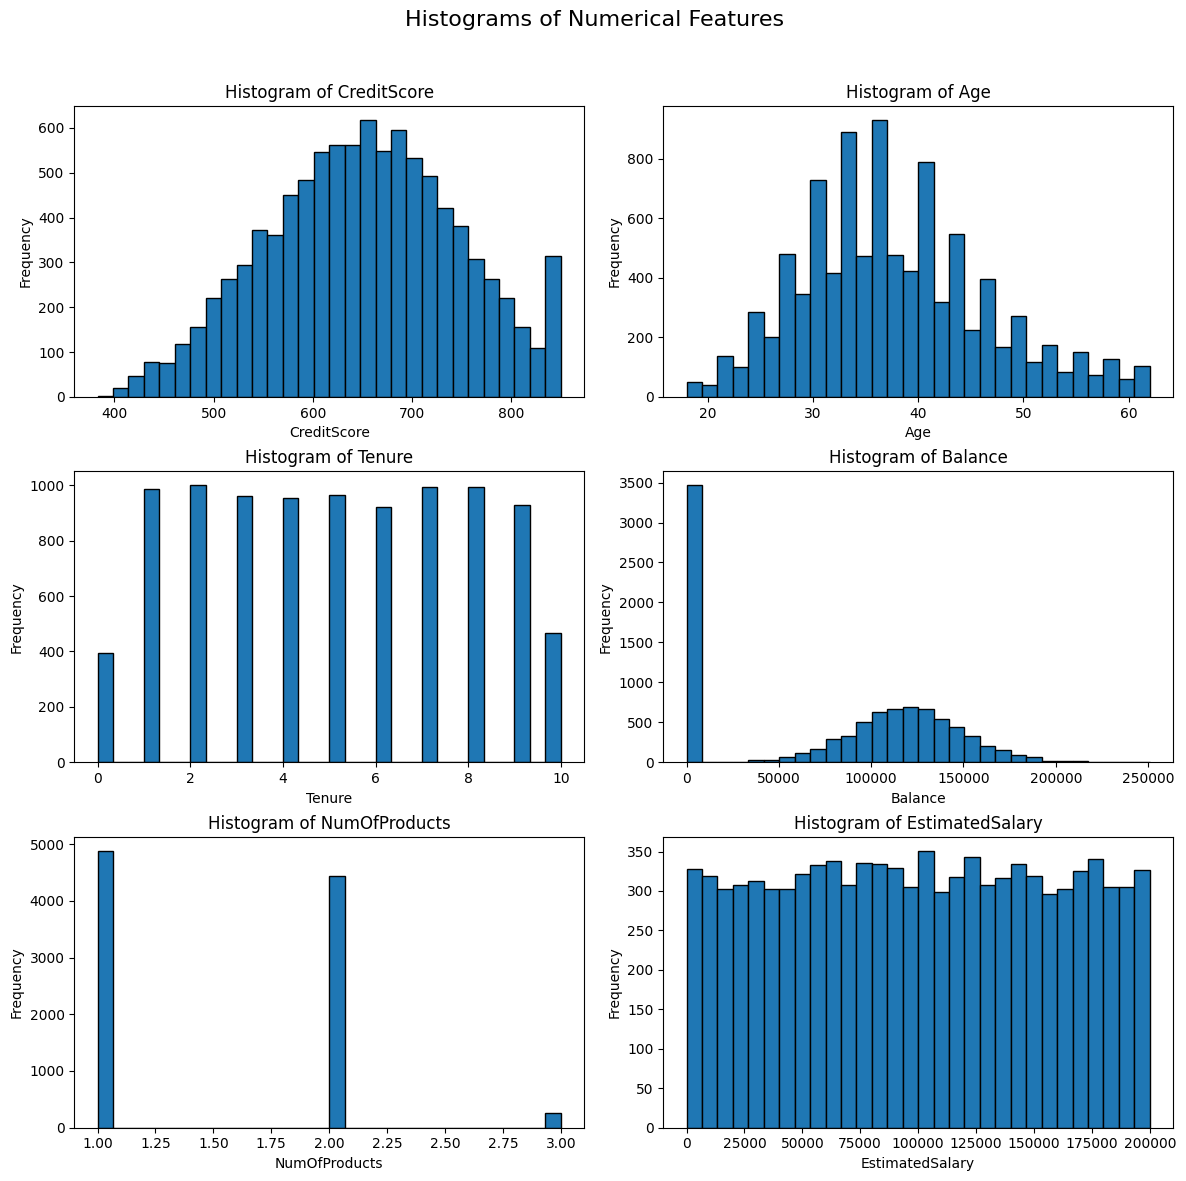

In [34]:
rows = (len(numerical_features) // 2) + (len(numerical_features) % 2)
cols = 2

# Membuat figure dan axes untuk subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()  # Mengubah axes menjadi array satu dimensi untuk kemudahan akses

# Membuat histogram untuk setiap feature
for i, feature in enumerate(numerical_features):
    axes[i].hist(data[feature], bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Menghapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mengatur layout dari subplot
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.subplots_adjust(top=0.9)  # Memberikan ruang untuk title
plt.show()

### KDE Plot

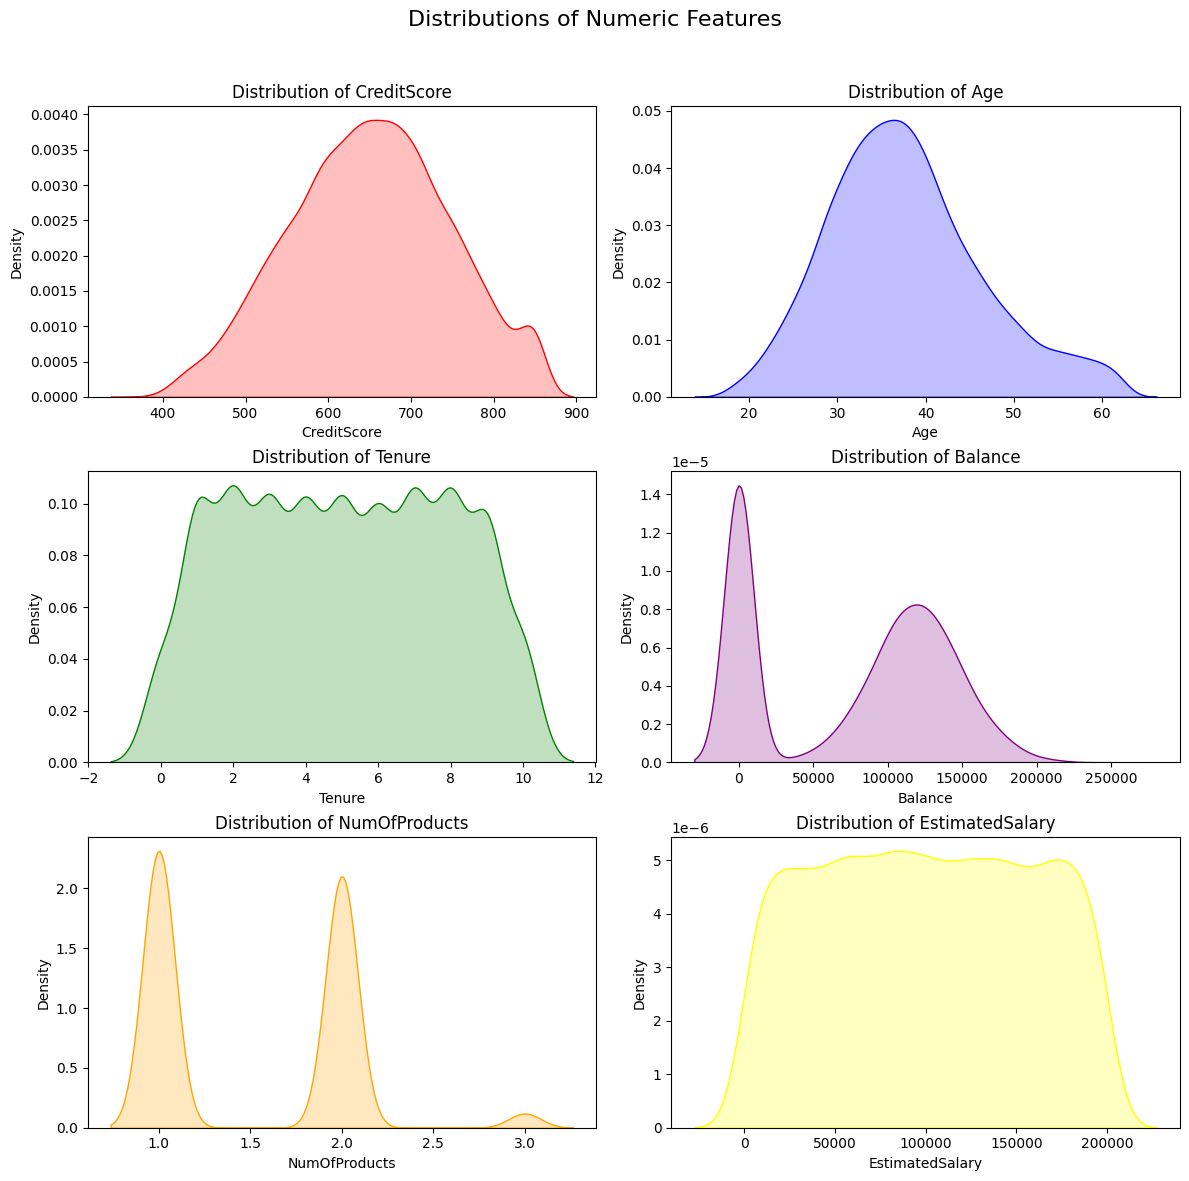

In [35]:
rows = (len(numerical_features) // 2) + (len(numerical_features) % 2)
cols = 2

colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow']


fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()  # Mengubah axes menjadi array satu dimensi untuk kemudahan akses

for n, feature in enumerate(numerical_features):
    sns.kdeplot(data[feature], ax=axes[n], color=colors[n], fill=True)
    axes[n].set_title(f'Distribution of {feature}')
    axes[n].set_xlabel(feature)
    axes[n].set_ylabel('Density')

# Menghapus subplot kosong jika ada
for j in range(n + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

- Credit score pelanggan berada di range 400 hingga 800 dan miring ke kiri (left skewed).

- Rentang umur pengguna berada di sekitar 20 hingga 80 tahun, dan miring ke kanan (right skewed). Usia pelanggan dominan berada di rentang 20 hingga 40 tahun.

- Lama waktu pelanggan menggunakan layanan (Tenure) dari rentang 1 hingga 9 tahun hampir berjumlah sama rata.

- Produk atau layanan yang digunakan pelanggan paling banyak 1 hingga 2 layanan, hanya sedikit pelanggan yang menggunakan lebih dari 2 layanan.

- 70.5% pelanggan memiliki kartu kredit, sisanya tidak.

- Perbedaan proporsi pelanggan yang aktif dan tidak aktif cukup sedikit, hanya berbeda 3% dengan dengan pelanggan aktif yang terbanyak.

- Distribusi saldo pelanggan menunjukkan dua puncak (bimodal). Ada kelompok pelanggan dengan saldo mendekati nol, dan ada kelompok lain dengan saldo lebih tinggi, berkisar di sekitar 100k hingga 150k. Hal ini menunjukkan bahwa ada dua tipe utama pelanggan: mereka yang cenderung tidak menyimpan saldo di akun mereka dan mereka yang menyimpan saldo dalam jumlah signifikan.

- Distribusi Estimated Salary tersebar merata di seluruh rentang, dari 0 hingga sekitar 200k. Ini menunjukkan bahwa tidak ada kelompok pendapatan yang dominan di antara pelanggan; nasabah tersebar secara merata di berbagai tingkatan gaji.


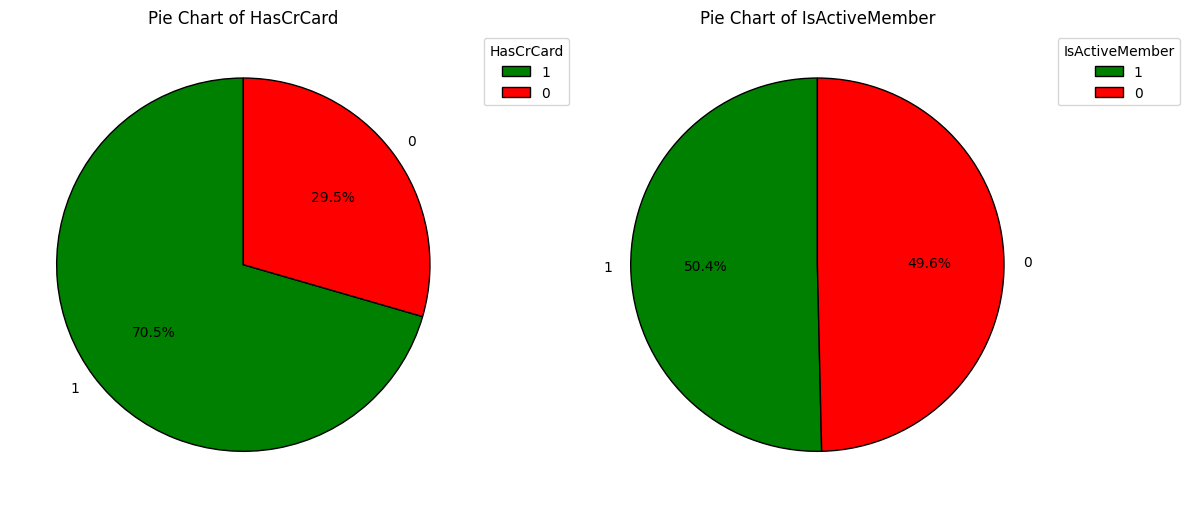

In [36]:
features_to_plot = categorical_features[2:]

fig, axes = plt.subplots(1, len(features_to_plot), figsize=(12, 6))

for i, feature in enumerate(features_to_plot):
    # Menghitung jumlah unique values dari feature
    feature_counts = data[feature].value_counts()
    
    wedges, texts, autotexts = axes[i].pie(
        feature_counts.values,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['green', 'red', 'blue', 'purple', 'orange', 'yellow'],
        wedgeprops={'edgecolor': 'black'}
    )
    
    axes[i].legend(
        wedges,
        feature_counts.index,
        title=f'{feature}',
        loc='upper left',
        bbox_to_anchor=(1, 1)
    )
    
    axes[i].set_title(f'Pie Chart of {feature}')

plt.tight_layout()
plt.show()

- Sebanyak 70.5% pelanggan memiliki credit card
- Distribusi member aktif dan tidak aktif hampir seimbang

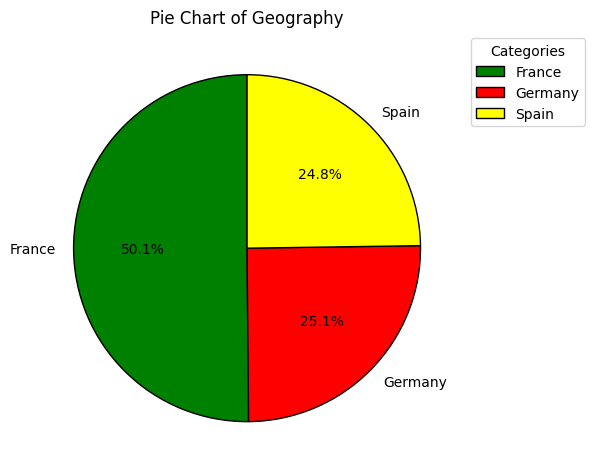

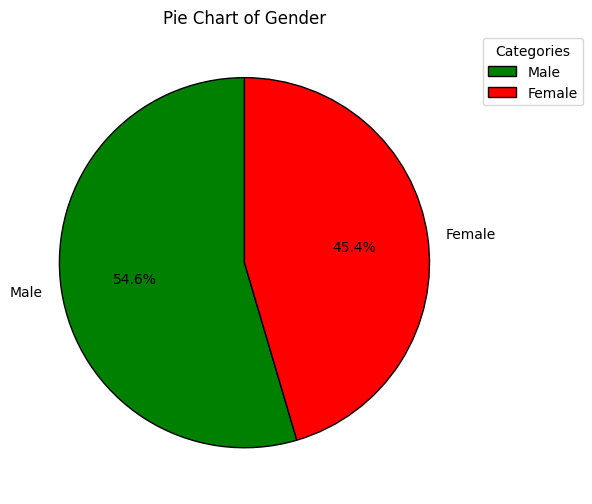

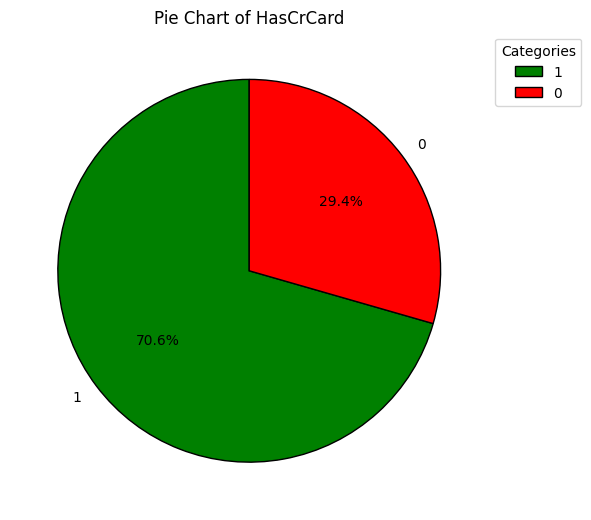

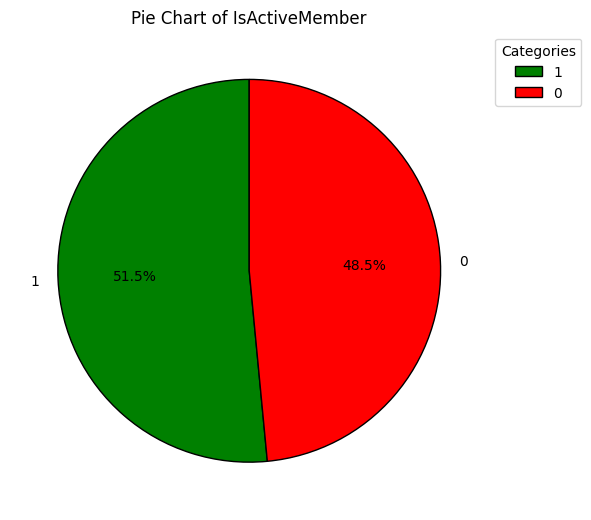

In [19]:
for feature in categorical_features:
    # Menghitung jumlah unique values dari feature
    feature_counts = data[feature].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(
        feature_counts.values,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['green', 'red', 'yellow', 'purple', 'orange', 'yellow'],
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title(f'Pie Chart of {feature}')
    
    plt.legend(
        feature_counts.index,
        title='Categories',
        loc='upper left',
        bbox_to_anchor=(1, 1)
    )
    
    # Menampilkan pie chart
    plt.tight_layout()
    plt.show()

- Pelanggan terbanyak berasal dari France yaitu sebesar 50%, diikuti Germany dan Spain.
- Sebanyak 54.6% pelanggan adalah pria.

## Multivariate Analysis

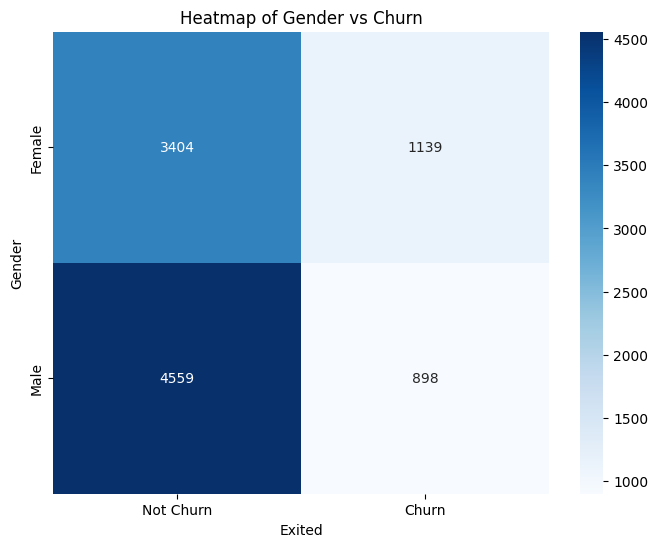

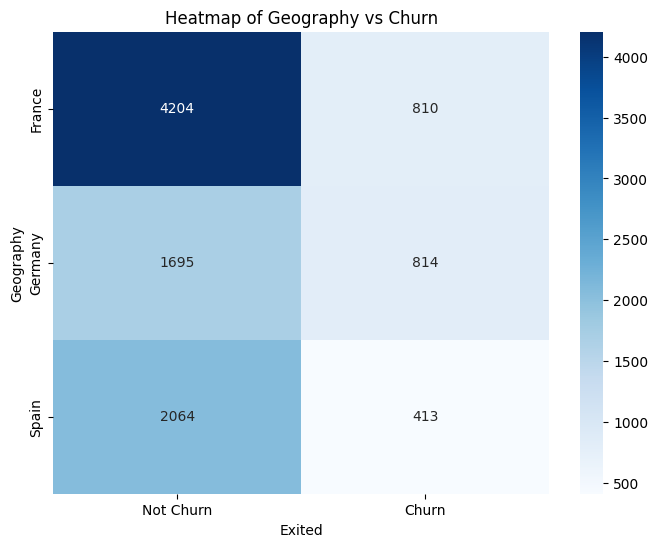

In [251]:
# cross-tabulation antara Gender dan Churn
gender_churn_ct = pd.crosstab(data['Gender'], data['Exited'])

# heatmap untuk Gender vs Churn
plt.figure(figsize=(8, 6))
sns.heatmap(gender_churn_ct, annot=True, cmap='Blues', fmt='d', cbar=True, 
            xticklabels=['Not Churn', 'Churn'], yticklabels=gender_churn_ct.index.tolist())
plt.title('Heatmap of Gender vs Churn')
plt.show()

# cross-tabulation antara Geography dan Churn
geo_churn_ct = pd.crosstab(data['Geography'], data['Exited'])

# heatmap untuk Geography vs Churn
plt.figure(figsize=(8, 6))
sns.heatmap(geo_churn_ct, annot=True, cmap='Blues', fmt='d', cbar=True, 
            xticklabels=['Not Churn', 'Churn'], yticklabels=geo_churn_ct.index.tolist())
plt.title('Heatmap of Geography vs Churn')
plt.show()

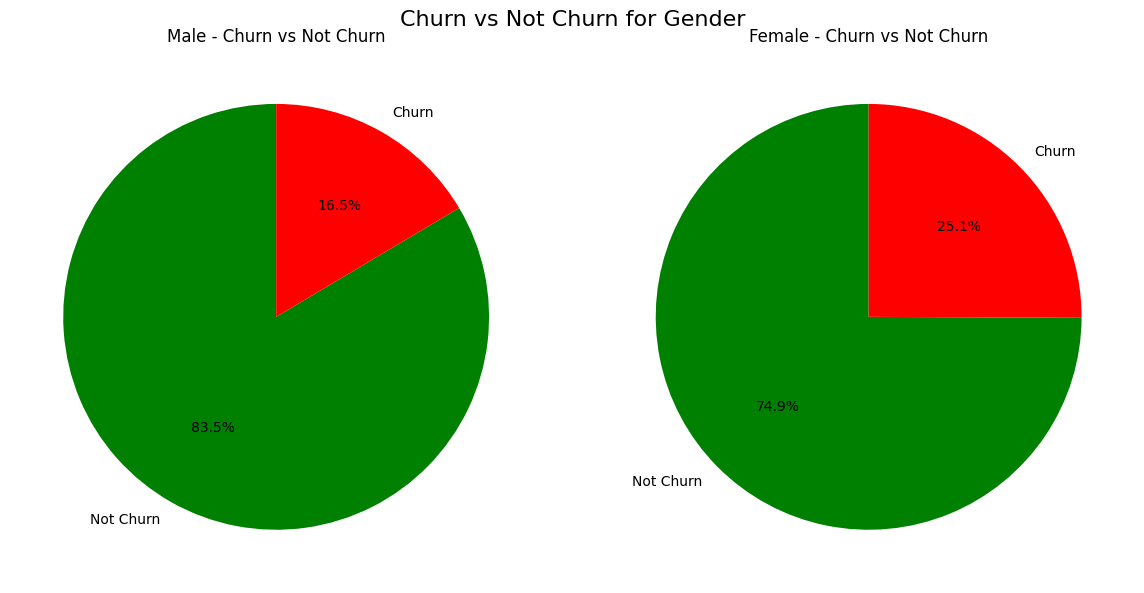

In [52]:
# Cross-tab untuk Gender dan Churn
gender_churn = pd.crosstab(data['Gender'], data['Exited'], normalize='index') * 100

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(gender_churn.loc['Male'], labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[0].set_title('Male - Churn vs Not Churn')

ax[1].pie(gender_churn.loc['Female'], labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[1].set_title('Female - Churn vs Not Churn')

fig.suptitle('Churn vs Not Churn for Gender', fontsize=16)

plt.tight_layout()
plt.show()

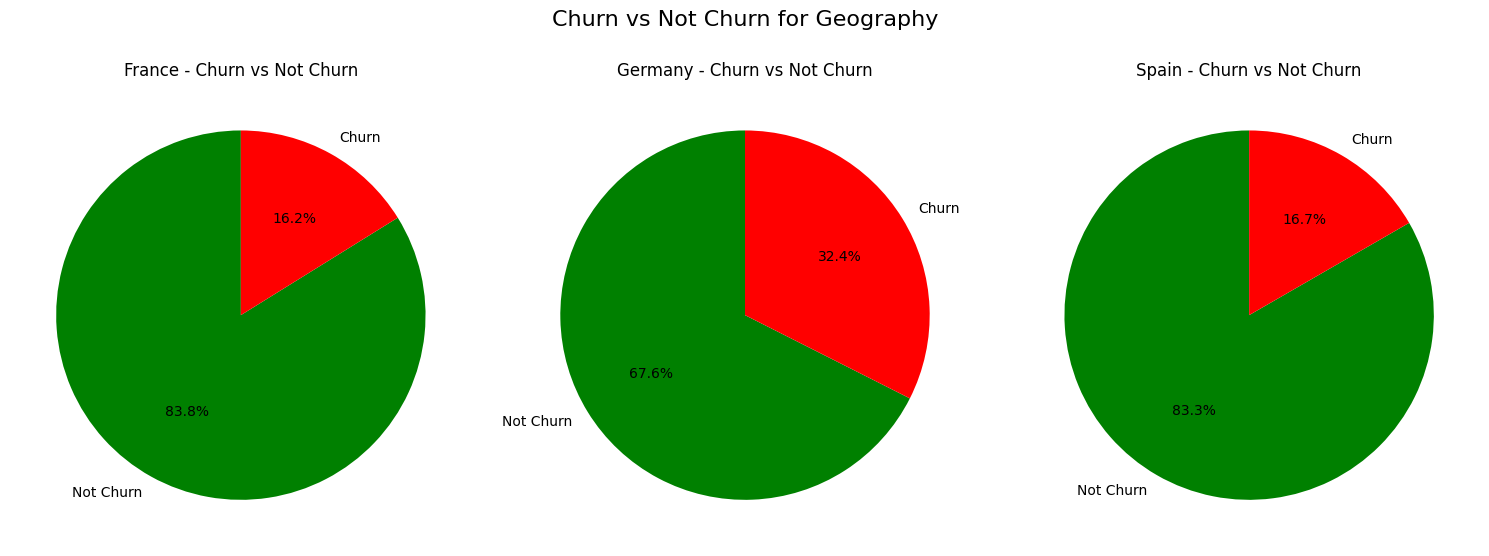

In [53]:
# Cross-tab untuk Geography dan Churn
geo_churn = pd.crosstab(data['Geography'], data['Exited'], normalize='index') * 100

fig, ax = plt.subplots(1, 3, figsize=(15, 6))

ax[0].pie(geo_churn.loc['France'], labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[0].set_title('France - Churn vs Not Churn')

ax[1].pie(geo_churn.loc['Germany'], labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[1].set_title('Germany - Churn vs Not Churn')

ax[2].pie(geo_churn.loc['Spain'], labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[2].set_title('Spain - Churn vs Not Churn')

fig.suptitle('Churn vs Not Churn for Geography', fontsize=16)

plt.tight_layout()
plt.show()

Berdasarkan heatmap dan pie chart, churn lebih banyak untuk gender `male` sebanyak 25%, dan negara `Germany` sebnayak 34%

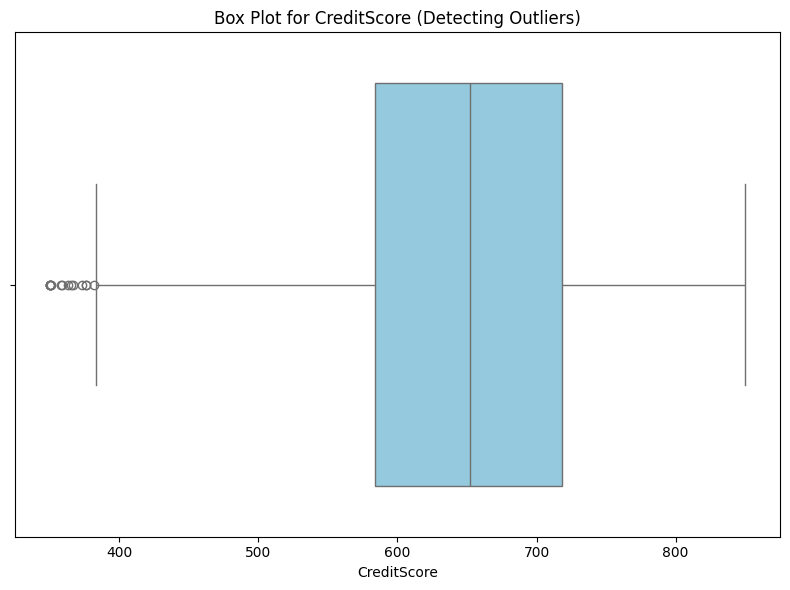

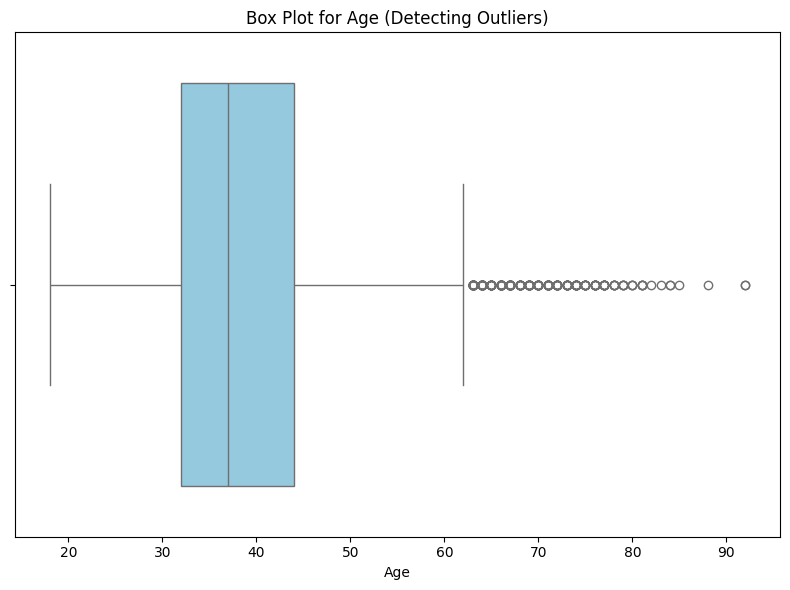

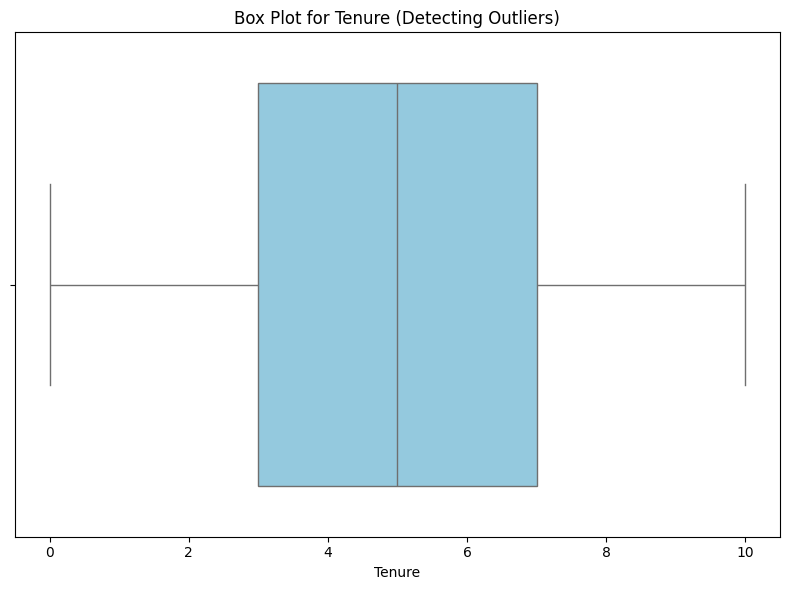

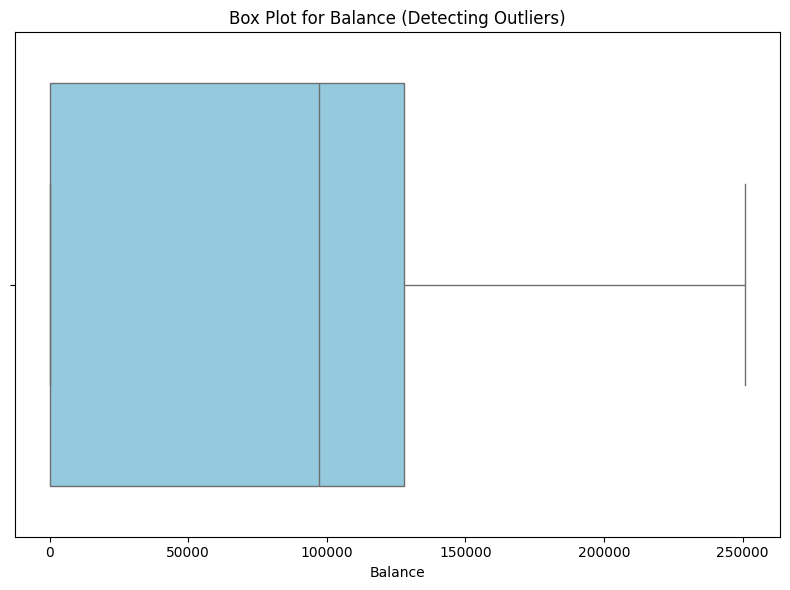

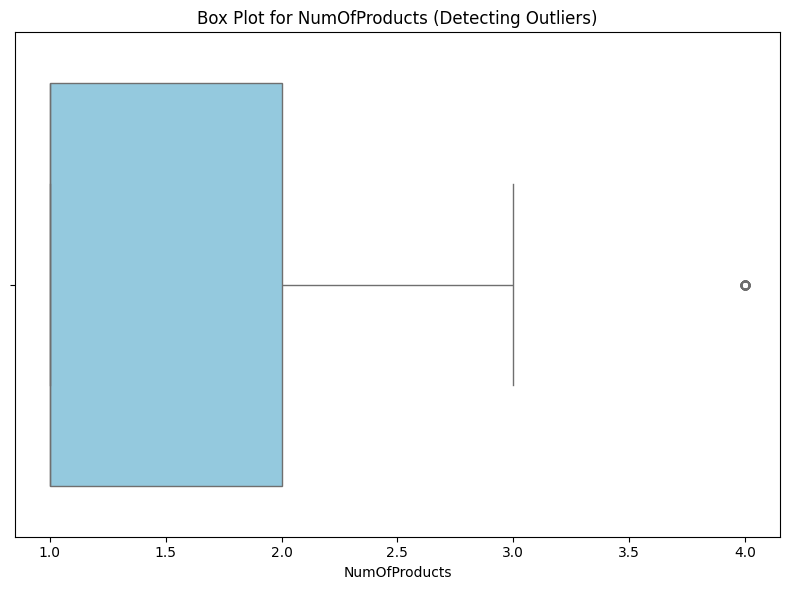

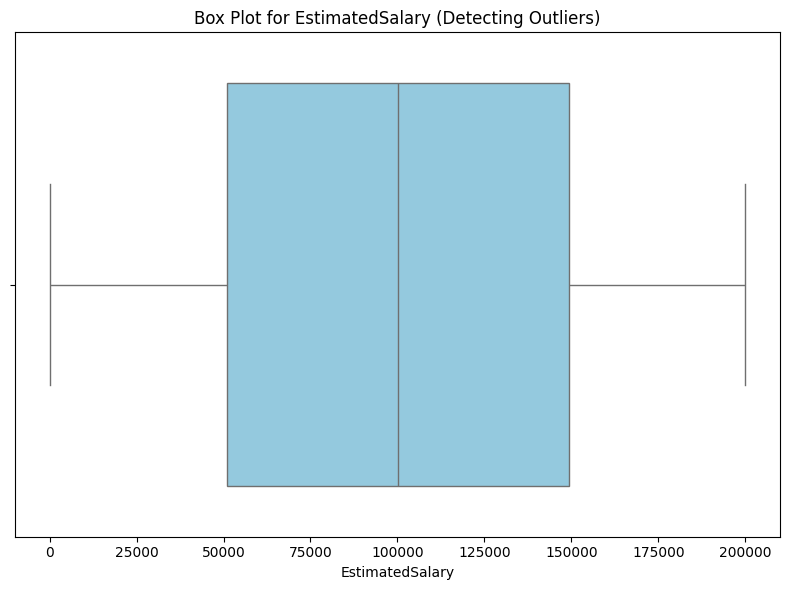

In [54]:
# Membuat box plot untuk setiap feature numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature], color='skyblue')
    plt.title(f"Box Plot for {feature} (Detecting Outliers)")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

Pada boxplot di atas terdapat beberapa outliers pada fitur numerik. Outlier pada data `Age` akan ditangani karena analisis akan berfokus pada pelanggan dengan usia 20 sampai 60 tahun, dan pelanggan di atas rentang tersebut cukup sedikit, bisa dilihat pada plot [KDE](#kde-plot) di atas.

In [55]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data yang bukan outliers
data = data[~((data[numerical_features] < lower_bound) | (data[numerical_features] > upper_bound)).any(axis=1)]

In [56]:
data.shape

(9568, 13)

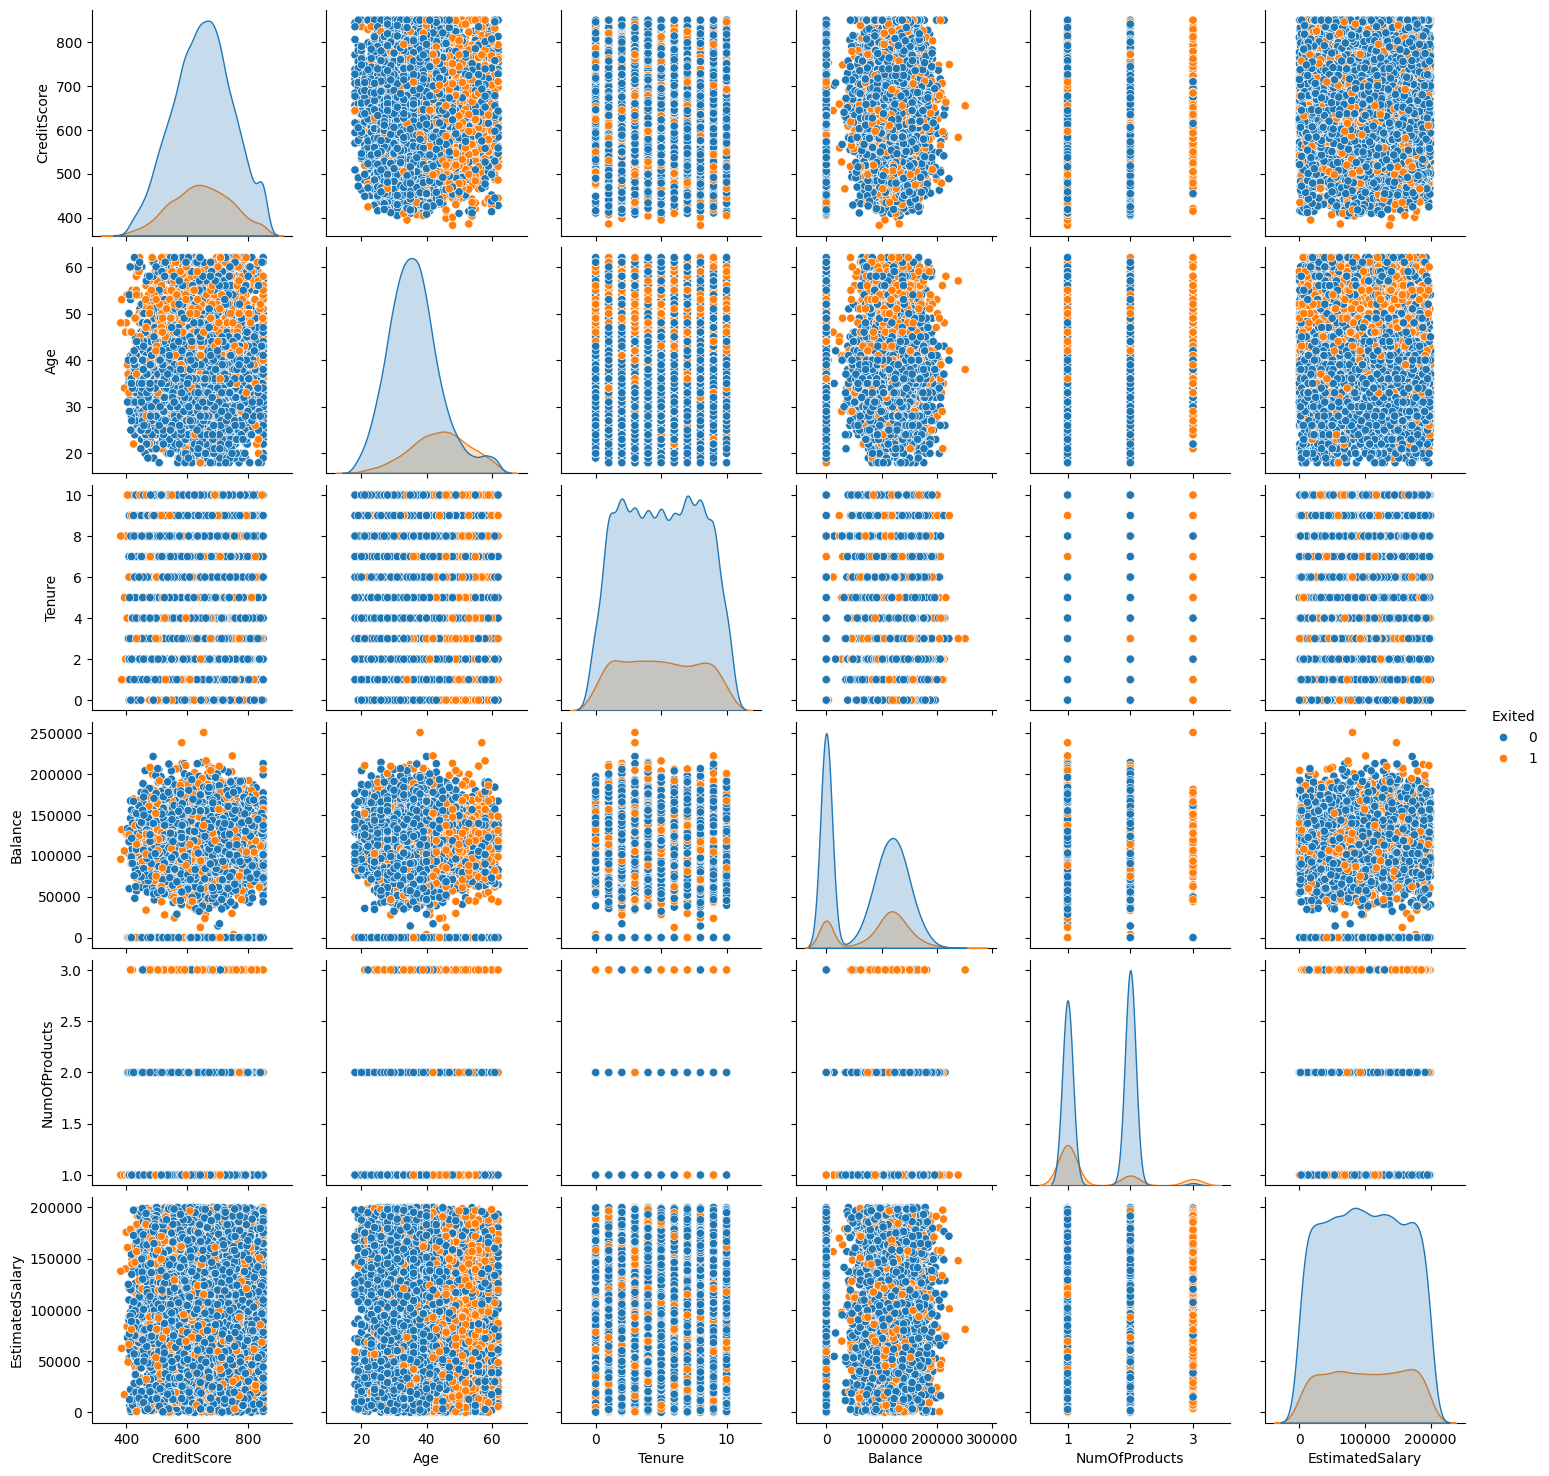

In [57]:
sns.pairplot(data[numerical_features + [target]], diag_kind = 'kde',  hue='Exited')
plt.show()

Berikut kesimpulan berdasarkan pairplot di atas:

- Variabel `Age` dan `Balance` menunjukkan pola yang lebih jelas dalam memengaruhi churn. Pelanggan yang lebih tua (di atas 50 tahun) dan pelanggan dengan saldo tinggi cenderung lebih berpotensi untuk churn (Exited = 1). Hal ini menunjukkan bahwa usia dan saldo akun merupakan faktor penting yang perlu diperhatikan dalam menganalisis dan memprediksi churn.

- Variabel seperti `CreditScore`, `Tenure`, dan `EstimatedSalary` tidak menunjukkan pola yang jelas dalam kaitannya dengan churn. Data ini tersebar merata untuk kedua kategori (Exited = 0 dan 1), yang mengindikasikan bahwa variabel-variabel ini mungkin tidak memiliki dampak signifikan dalam menentukan apakah pelanggan akan churn atau tidak.

- Variabel `NumOfProducts` memperlihatkan bahwa pelanggan dengan satu atau dua produk memiliki distribusi churn yang merata, sedangkan pelanggan dengan tiga produk lebih jarang terlihat churn. Ini mungkin menunjukkan bahwa pelanggan yang lebih beragam dalam penggunaan produk bank cenderung lebih loyal.

Secara keseluruhan, usia pelanggan dan saldo mereka tampaknya menjadi faktor kunci yang perlu difokuskan dalam strategi retensi pelanggan. Analisis lebih lanjut diperlukan untuk memahami bagaimana mengoptimalkan interaksi dengan segmen pelanggan ini untuk mengurangi tingkat churn.

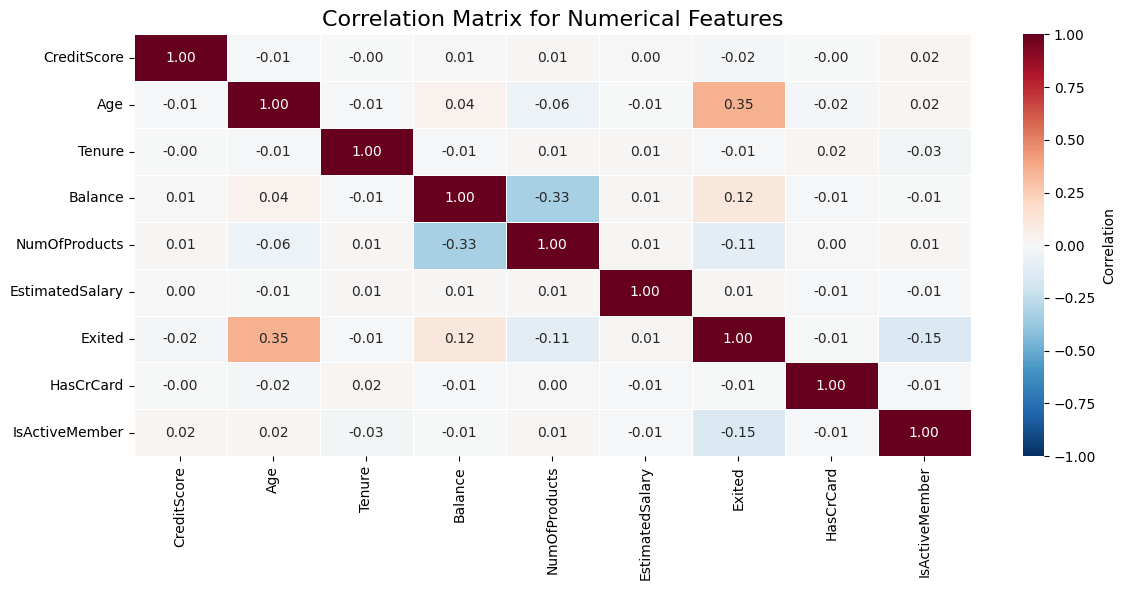

In [58]:
# Menghitung matriks korelasi antar fitur numerik
correlation_matrix = data[numerical_features + [target] + categorical_features[2:]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            vmin=-1, vmax=1,
            center=0, 
            linewidths=0.5,
            cbar_kws={'label': 'Correlation'},
            fmt='.2f')

plt.title("Correlation Matrix for Numerical Features", fontsize=16)
plt.tight_layout()

plt.show()

Kesimpulan dari correlation matrix di atas adalah:
Variabel `Age`, `Balance`, `NumOfProducts`, `Tenure`, dan `IsActiveMember` adalah variabel yang menunjukkan korelasi paling kuat dengan churn, meskipun keempatnya masih dalam kategori moderat hingga lemah.
Variabel lain seperti `CreditScore`, `EstimatedSalary`, dan `HasCrCard` tidak memiliki korelasi yang signifikan dengan churn dalam dataset ini.

## Data Preparation
Variabel yang akan diaplikasikan untuk reduksi dengan PCA yaitu `Age`, `EstimatedSalary`, `CreditScore`, `Balance`, `NumOfProducts`, `Tenure`.

### Dimensionality Reduction With PCA 

In [197]:
# Data yang digunakan
features_with_tenure = ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts', 'Tenure']
features_without_tenure = ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts']
y = data['Exited'] # Target variable

In [61]:
# Fungsi untuk plotting variansi kumulatif dan PCA
def plot_pca_variance(X_scaled):
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Plot variansi kumulatif
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.title('Cumulative Explained Variance by PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    # Print variansi kumulatif
    for i, var in enumerate(cumulative_variance):
        print(f"Component {i+1}: {var:.4f} variance explained")

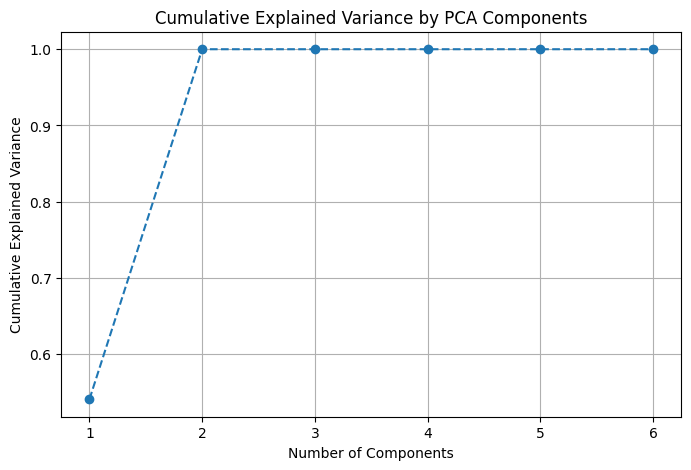

Component 1: 0.5411 variance explained
Component 2: 1.0000 variance explained
Component 3: 1.0000 variance explained
Component 4: 1.0000 variance explained
Component 5: 1.0000 variance explained
Component 6: 1.0000 variance explained


In [62]:
pca = plot_pca_variance(data[numerical_features])

Component 1 menjelaskan 54.11% dari variansi, dan Component 2 menjelaskan total 100% (termasuk variansi dari Component 1). Ini menunjukkan bahwa dengan dua komponen pertama, sudah menjelaskan 100% dari variansi data.

In [63]:
# Menggunakan dua komponen yang menjelaskan 100% variansi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[numerical_features])

# Model training dengan data hasil PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, data[target], test_size=0.3, random_state=42)

Karena proporsi data `Churn dan Not Churn` pada variabel `Exited` tidak seimbang, teknik oversampling dengan SMOTE akan digunakan dan diterapkan pada beberapa model yang tidak mempunyai paramater untuk mengatasi kelas imbalance seperti `SVM`, `KNN`, `Gradient Boosting`, dan `MLP`

In [79]:
# Preprocessor: scaling for numerical features and one-hot encoding for categorical features
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

# Preprocessing pipeline: Scaling + Encoding + PCA
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('scaler', scaler), ('pca', PCA(n_components=2))]), numerical_features),
        ('cat', encoder, categorical_features)
    ]
)

# Train-test split
X = data.drop(columns=[target, 'CustomerId', 'Surname'])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply preprocessing on training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE after preprocessing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [122]:
# List of models to use
models = {
    'Logistic Regression': LogisticRegression(C=1, max_iter=100, penalty='l2', solver='saga', random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42),
    'SVM': SVC(C=1, gamma='scale', kernel='rbf', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=9, algorithm='auto', weights='uniform'),
    'XGBoost': XGBClassifier(objective='binary:logistic', colsample_bytree=0.8, gamma=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, random_state=42),
    'MLPClassifier': MLPClassifier(max_iter=700, activation='tanh', alpha=0.01, hidden_layer_sizes=(100,), solver='adam', random_state=42)
}

# DataFrame to store evaluation results
results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'ROC-AUC'])

# Loop to train models and evaluate
for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test_preprocessed)
    
    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Predict probabilities for ROC-AUC (for models that support probability predictions)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_preprocessed)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Extract metrics
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    accuracy = report['accuracy']
    
    # Create a new DataFrame row with the results
    new_row = pd.DataFrame({
        'Model': [name],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'Accuracy': [accuracy],
        'ROC-AUC': [roc_auc]
    })
    
    # Concatenate the new row to the results DataFrame
    results_df = pd.concat([results_df, new_row], ignore_index=True)

/var/folders/fz/p1481t9n2jj2kgrtykj1h8_80000gn/T/ipykernel_84563/481899410.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [123]:
results_df

,Model,Precision,Recall,F1 Score,Accuracy,ROC-AUC
0,Logistic Regression,0.783365,0.678858,0.708920,0.678858,0.725850
1,Random Forest,0.792778,0.741205,0.759124,0.741205,0.772208
2,Gradient Boosting,0.798274,0.732497,0.753587,0.732497,0.782248
3,SVM,0.791813,0.708464,0.733807,0.708464,0.755720
4,KNN,0.782152,0.706374,0.730779,0.706374,0.719143
5,XGBoost,0.796419,0.733542,0.754071,0.733542,0.774878
6,MLPClassifier,0.796010,0.695228,0.723555,0.695228,0.769570


Selanjutnya, pilih model terbaik berdasarkan metrik evaluasi Recall, F1-Score, dan ROC-AUC. Berikut penjelasan singkat mengapa ketiga metrik tersebut dipilih.
- Recall: Metrik ini digunakan untuk mengetahui seberapa baik model dalam mendeteksi kelas positif (sangat penting jika Anda menginginkan model yang bagus dalam menangkap positif).

- F1-Score: Ini adalah rata-rata harmonik dari Precision dan Recall, digunakan untuk menyeimbangkan keduanya, terutama pada dataset yang tidak seimbang.

- ROC-AUC: Metrik ini mengukur seberapa baik model dapat membedakan antara kelas positif dan negatif secara keseluruhan. AUC (Area Under Curve) dari ROC (Receiver Operating Characteristic) lebih tinggi berarti model lebih baik dalam diskriminasi.

Pada kasus ini, karena data variabel target (`Exited`) tidak seimbang ini, pemilihan metrik evaluasi seperti Recall, F1-Score, dan ROC-AUC sering kali lebih penting daripada akurasi karena tugas utama adalah mendeteksi sebanyak mungkin churn, meski ada beberapa kesalahan prediksi (false positives)

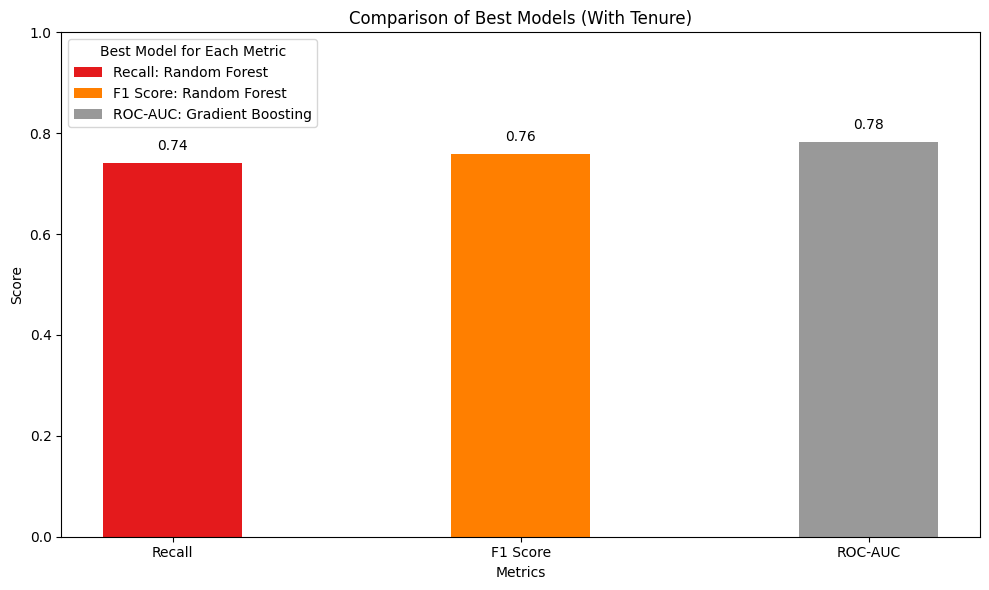

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_best_model_comparison(metrics, values, models, title):
    """ Fungsi plot perbandingan model terbaik untuk setiap metrik.

    Args:
        metrics (list): List nama metrik (e.g., ['Recall', 'F1 Score', 'ROC-AUC']).
        values (list): List metric values.
        models (list): List nama model terbaik.
        title (str): Title of the plot.
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Number of metrics
    x = np.arange(len(metrics))
    
    # Define the bar width
    width = 0.4

    # Generate colors dynamically using a colormap
    cmap = plt.get_cmap('Set1')
    colors = [cmap(i) for i in np.linspace(0, 1, len(metrics))]

    # Create the bars with different colors
    bars = ax.bar(x, values, width, color=colors)

    # Set labels, title, and ticks
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 1)

    # Add labels on top of the bars
    def add_labels(bars, values):
        for bar, value in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                    f'{value:.2f}', ha='center', va='bottom')

    add_labels(bars, values)

    # Add legend with model names for each metric
    legend_labels = [f"{metric}: {model}" for metric, model in zip(metrics, models)]
    ax.legend(bars, legend_labels, title='Best Model for Each Metric')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Ambil model terbaik berdasarkan Recall, F1-Score, dan ROC-AUC dari dataset dengan Tenure
best_recall_with_tenure = results_df.loc[results_df['Recall'].idxmax()]
best_f1_with_tenure = results_df.loc[results_df['F1 Score'].idxmax()]
best_roc_auc_with_tenure = results_df.loc[results_df['ROC-AUC'].idxmax()]

# Data untuk plotting
metrics = ['Recall', 'F1 Score', 'ROC-AUC']
values_with_tenure = [
    best_recall_with_tenure['Recall'], 
    best_f1_with_tenure['F1 Score'], 
    best_roc_auc_with_tenure['ROC-AUC']
]

# Nama model terbaik untuk setiap metrik
models_with_tenure = [
    best_recall_with_tenure['Model'], 
    best_f1_with_tenure['Model'], 
    best_roc_auc_with_tenure['Model']
]

# Plotting hasil
plot_best_model_comparison(metrics, values_with_tenure, models_with_tenure, title='Comparison of Best Models (With Tenure)')


Berdasarkan data di atas, model dengan metrik evaluasi Recall, F1-Score, dan ROC-AUC terbaik adalah Gradient Boosting dan Random Forest. Jika ingin memilih model dengan metrik evaluasi ROC-AUC yang baik, bisa memilih model Gradient-Boosting, dan jika ingin memilih model berdasarkan metrik F1-Score dan Recall terbaik bisa memilih Random Forest.